In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [35]:
#seeing sample data from the dataset

df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [36]:
#Shape of dataset

df.shape

(100000, 9)

In [37]:
df.describe().T
#fairly clean and straight dataset not much cleaning needed but still lets find some more information about the features

,count,mean,std,min,25%,50%,75%,max
CustomerID,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.50,75000.25,100000.0
Age,100000.0,44.027020,15.280283,18.0,31.00,44.00,57.00,70.0
Subscription_Length_Months,100000.0,12.490100,6.926461,1.0,6.00,12.00,19.00,24.0
Monthly_Bill,100000.0,65.053197,20.230696,30.0,47.54,65.01,82.64,100.0
Total_Usage_GB,100000.0,274.393650,130.463063,50.0,161.00,274.00,387.00,500.0
Churn,100000.0,0.497790,0.499998,0.0,0.00,0.00,1.00,1.0


In [38]:
def check_df(df:pd.DataFrame):
    l = []
    columns = df.columns
    for col in columns:
        dtypes = df[col].dtypes
        nunique = df[col].nunique()
        sum_null = df[col].isnull().sum()
        l.append([col, dtypes, nunique, sum_null])
    df_check = pd.DataFrame(l)
    df_check.columns = ['col', 'dtypes', 'nunique', 'sum_null',]
    return df_check

In [39]:
check_df(df=df)

,col,dtypes,nunique,sum_null
0,CustomerID,int64,100000,0
1,Name,object,100000,0
2,Age,int64,53,0
3,Gender,object,2,0
4,Location,object,5,0
5,Subscription_Length_Months,int64,24,0
6,Monthly_Bill,float64,7001,0
7,Total_Usage_GB,int64,451,0
8,Churn,int64,2,0


<Axes: xlabel='Subscription_Length_Months', ylabel='Count'>

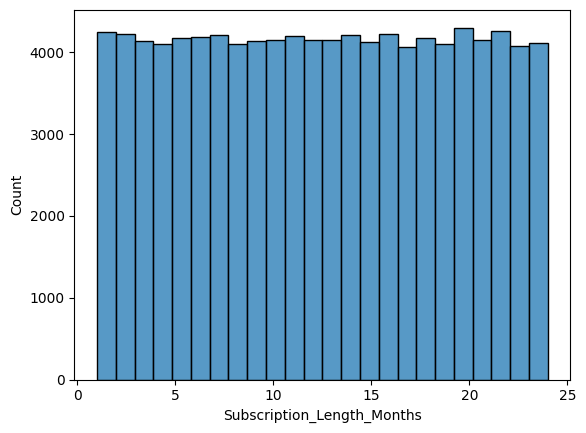

In [40]:
sns.histplot(df['Subscription_Length_Months'],bins=24)

In [41]:
def plot_boc_kde(col,df):
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], data=df, palette='winter',hue='Churn')
    
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(x=df[col], fill=True, color='blue')
    
    
    plt.tight_layout()
    plt.show()

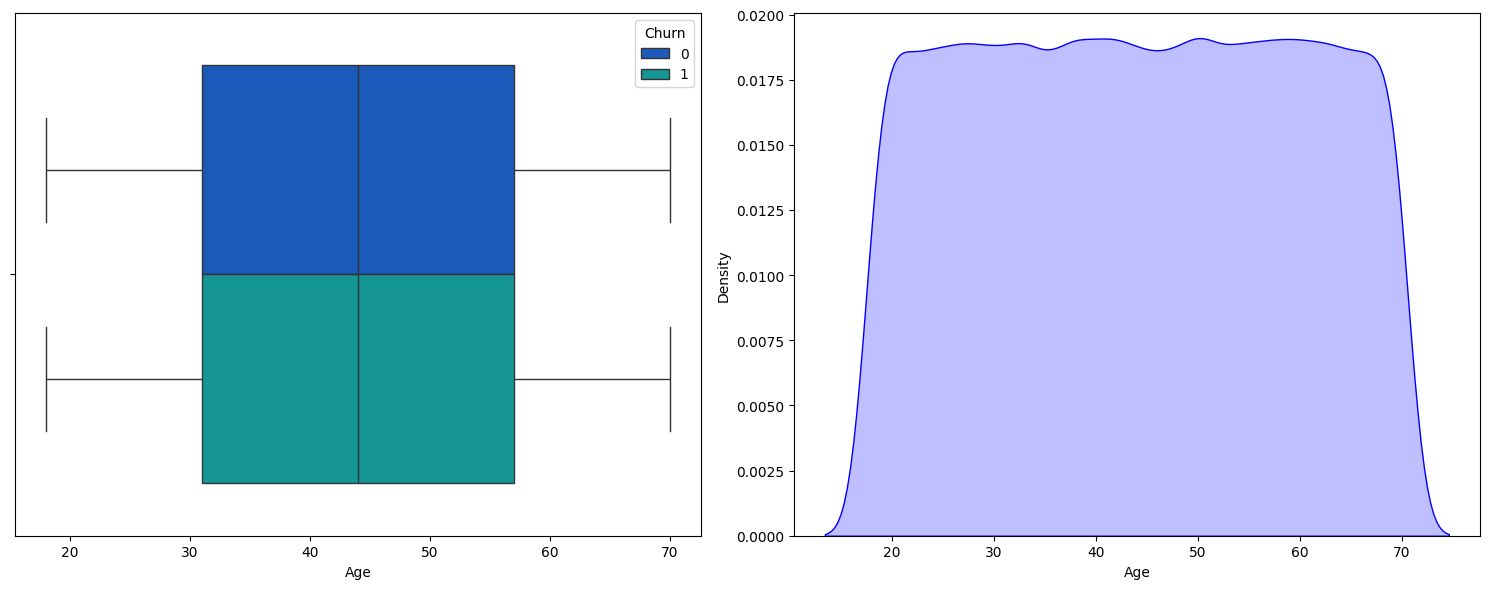

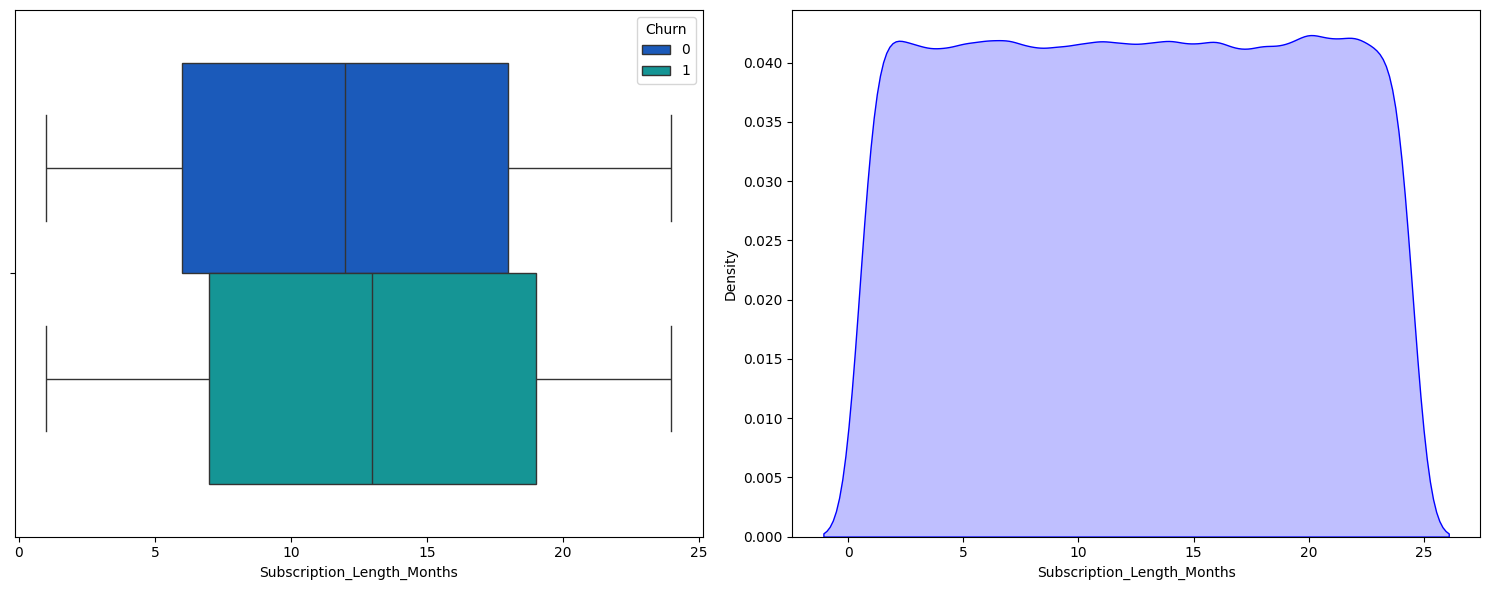

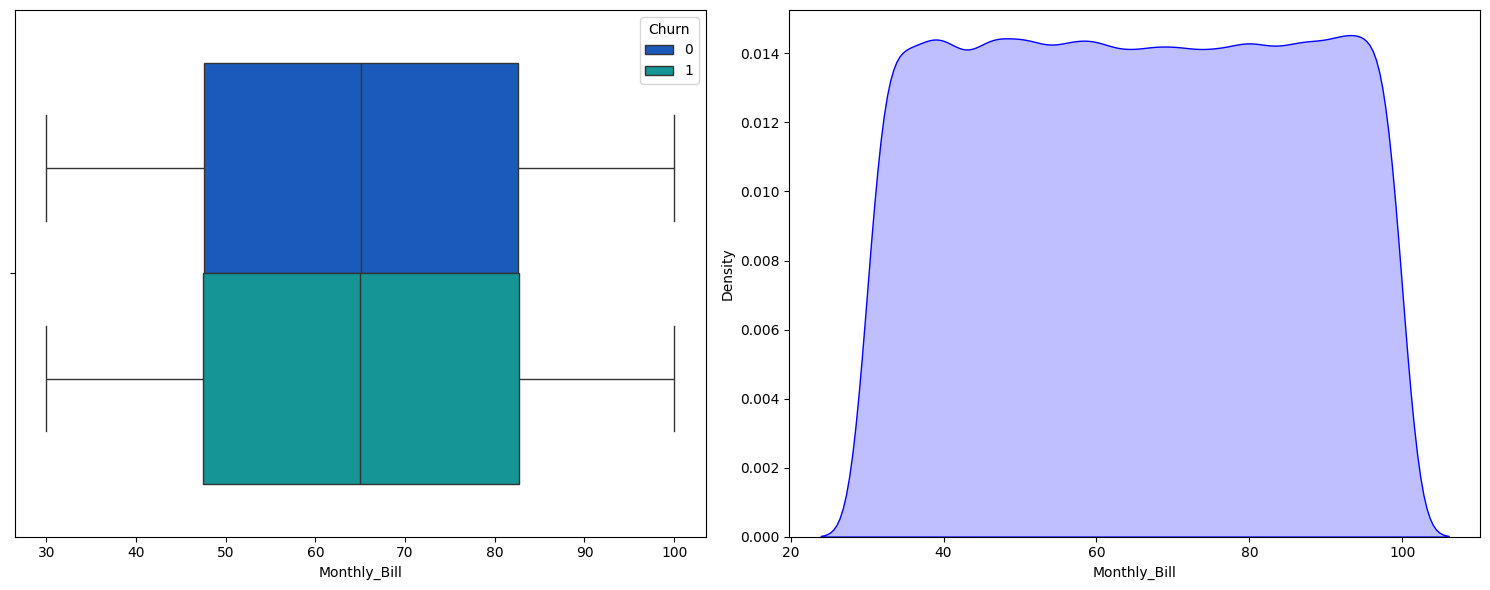

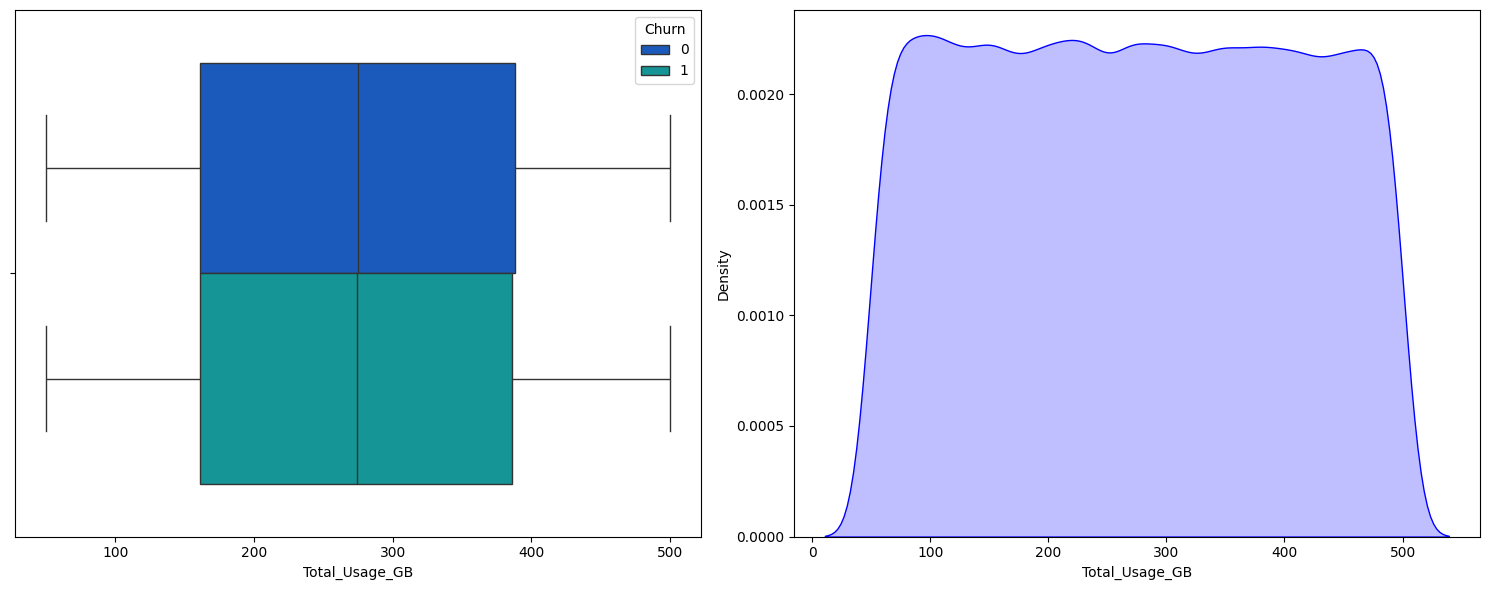

In [42]:
cols = ['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB',]
for col in cols:
    plot_boc_kde(col, df)

### From above plots its clear there are no Outliers

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [44]:
df_new = df.drop(['CustomerID','Name'],axis=1)
df_new.sample(1)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
71340,68,Female,New York,2,44.72,359,0


In [45]:
from sklearn.preprocessing import LabelEncoder 

In [46]:
le = LabelEncoder()
df_new['Gender'] = le.fit_transform(df_new['Gender'])
df_new['Location'] = le.fit_transform(df_new['Location'])
#df_new['Monthly_Bill'] = df_new['Monthly_Bill'].round()


df_new

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,0,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


In [47]:
df_new.corr()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
Gender,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121
Location,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
Subscription_Length_Months,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


<Axes: >

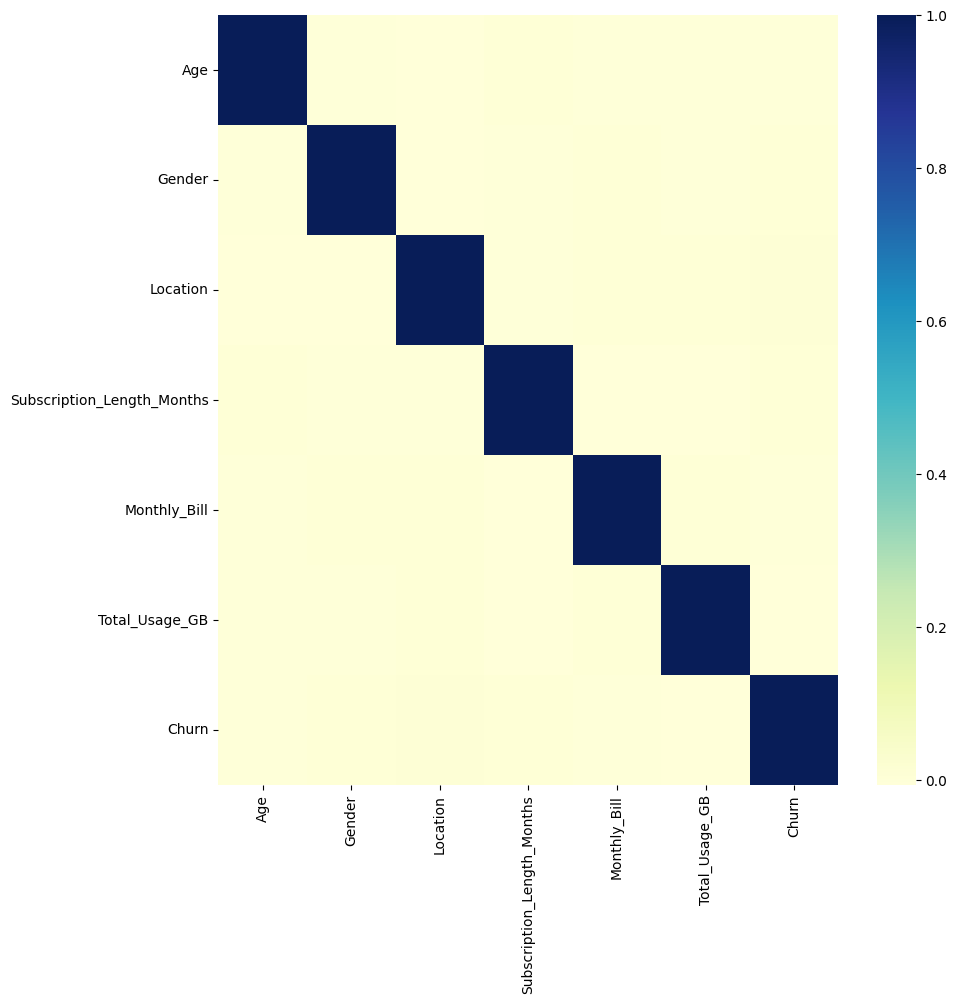

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),cmap='YlGnBu')

### No correlation or relationship between features this model requires advanced techniques just to cross 50% mark

In [49]:
X = df_new.drop('Churn',axis=1)
y = df_new['Churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
models = [RandomForestClassifier(n_estimators=250), XGBClassifier(n_estimators=250,booster='gbtree',learning_rate=0.01), KNeighborsClassifier(n_neighbors=100),
          MultinomialNB()]

In [55]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    
    y_test_pred = model.predict(X_test)
   
    test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    
    return test_accuracy

In [56]:
for m in models:
    accuracy = get_score(m,X_train,X_test,y_train, y_test)
    print(f"for model : {m}, accuracy is {accuracy}")

for model : RandomForestClassifier(n_estimators=250), accuracy is 0.49554545454545457
for model : XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), accuracy is 0.5025454545454545
for model : KNeighborsClassifier(n_neighbors=100), accuracy is 0.5073333333333333
for model : MultinomialNB()

###  Lets modify the above code to probably get better accuracy

I'm combining scores of various models to get good overall predictions this technique is something I came up with during a kaggle competition not used generally

In [77]:
def get_score(model:list, X_train, X_test, y_train, y_test):
    ypred = {}
    for m in model:
        model =  m.fit(X_train,y_train)
        ypred[str(m)] = model.predict(X_test)
    
    prediction = pd.DataFrame.from_dict(ypred)
    summed_predictions = prediction.sum(axis=1)
    combined_predictions = (summed_predictions > 0).astype(int)
    test_accuracy = accuracy_score(y_test, combined_predictions) # Calculate Accuracy
    
    return test_accuracy
    
   

In [78]:
get_score(models,X_train, X_test, y_train, y_test)

0.501

### Its clear from above result our ml models are not performing well features have a very weak relations with target, ANN may perform better but since we're deploying to render which has a very limited processing capability we cant use those techniques

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
test_ac = []
for train_idx, test_idx in kf.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_idx], X.iloc[test_idx], y.iloc[train_idx], y.iloc[test_idx]
    test_ac.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    

print('accuracy score :',np.mean(test_ac))